In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import time
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error

/home/anirudh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import warnings
warnings.filterwarnings('ignore')
from multiprocessing import cpu_count

# linear models: http://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd
from sklearn.linear_model import \
    LinearRegression, Ridge, Lasso, ElasticNet, \
    Lars, LassoLars, \
    OrthogonalMatchingPursuit, \
    BayesianRidge, ARDRegression, \
    SGDRegressor, \
    PassiveAggressiveRegressor, \
    RANSACRegressor, HuberRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

# svm models: http://scikit-learn.org/stable/modules/svm.html
from sklearn.svm import SVR, NuSVR, LinearSVR

# neighbor models: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
y=df_train.y

In [8]:
from sklearn.preprocessing import LabelEncoder
train=df_train
test=df_test

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))

Shape train: (4209, 378)
Shape test: (4209, 377)


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train=ss.fit_transform(train.drop(['y'],axis=1))
X_test=ss.fit_transform(test)

In [10]:
from sklearn.decomposition import PCA,FastICA


pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ica = FastICA(random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

In [11]:
for i in range(1, 15):
    train['pca_' + str(i)] = X_train_pca[:,i-1]
    test['pca_' + str(i)] = X_test_pca[:, i-1]
    
    train['ica_' + str(i)] = X_train_ica[:,i-1]
    test['ica_' + str(i)] = X_test_ica[:, i-1]
    
ss2 = StandardScaler()
train=ss.fit_transform(train.drop(['y'],axis=1))
test=ss.fit_transform(test)

In [12]:
print(cpu_count())

8


In [13]:
clf_XG_L1 = XGBRegressor()
start_time = time.time()
score_XG_L1 = cross_val_score(clf_XG_L1,train,y,cv=8,n_jobs=-1)
print(score_XG_L1)
y_train_pred_XG_L1 = cross_val_predict(clf_XG_L1,train,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_XG_L1))
R_XG_L1 = XGBRegressor()
R_XG_L1.fit(train,y)
y_pred_XG_L1 = R_XG_L1.predict(test)

[ 0.59374552  0.39011633  0.53308816  0.64038825  0.54880383  0.50938081
  0.62626416  0.63605276]
--- 24.419834137 seconds ---
0.551461221632


In [14]:
clf_KN_L1 = KNeighborsRegressor(n_neighbors=25)
start_time = time.time()
score_KN_L1 = cross_val_score(clf_KN_L1,train,y,cv=8,n_jobs=-1)
print(score_KN_L1)
y_train_pred_KN_L1 = cross_val_predict(clf_KN_L1,train,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_KN_L1))
R_KN_L1 = KNeighborsRegressor(n_neighbors=25)
R_KN_L1.fit(train,y)
y_pred_KN_L1 = R_KN_L1.predict(test)

[ 0.41885815  0.28395392  0.39750951  0.43527938  0.40232534  0.37517053
  0.45474066  0.41897339]
--- 4.82286000252 seconds ---
0.395506089965


In [15]:
clf_RF_L1 = RandomForestRegressor()
start_time = time.time()
score_RF_L1 = cross_val_score(clf_RF_L1,train,y,cv=8,n_jobs=-1)
print(score_RF_L1)
y_train_pred_RF_L1 = cross_val_predict(clf_RF_L1,train,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_RF_L1))
R_RF_L1 = RandomForestRegressor()
R_RF_L1.fit(train,y)
y_pred_RF_L1 = R_RF_L1.predict(test)

[ 0.50392989  0.32551714  0.46309312  0.51546715  0.4591914   0.43321483
  0.53662897  0.49407449]
--- 5.90564012527 seconds ---
0.461495933769


In [16]:
clf_ETR_L1 = ExtraTreesRegressor()
start_time = time.time()
score_ETR_L1 = cross_val_score(clf_ETR_L1,train,y,cv=8,n_jobs=-1)
print(score_ETR_L1)
y_train_pred_ETR_L1 = cross_val_predict(clf_ETR_L1,train,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_ETR_L1))
R_ETR_L1 = ExtraTreesRegressor()
R_ETR_L1.fit(train,y)
y_pred_ETR_L1 = R_ETR_L1.predict(test)

[ 0.40476346  0.2923083   0.47371853  0.34931667  0.40001782  0.36023013
  0.50347527  0.37577696]
--- 7.23175621033 seconds ---
0.394729101833


In [18]:
clf_BR_L1 = BaggingRegressor()
start_time = time.time()
score_BR_L1 = cross_val_score(clf_BR_L1,train,y,cv=8,n_jobs=-1)
print(score_BR_L1)
y_train_pred_BR_L1 = cross_val_predict(clf_BR_L1,train,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_BR_L1))
R_BR_L1 = BaggingRegressor()
R_BR_L1.fit(train,y)
y_pred_BR_L1 = R_BR_L1.predict(test)

[ 0.48893936  0.3383312   0.47194557  0.54396562  0.4529762   0.39511285
  0.47361379  0.51206507]
--- 6.02016806602 seconds ---
0.455485167182


In [19]:
clf_GBR_L1 = GradientBoostingRegressor()
start_time = time.time()
score_GBR_L1 = cross_val_score(clf_GBR_L1,train,y,cv=8,n_jobs=-1)
print(score_GBR_L1)
y_train_pred_GBR_L1 = cross_val_predict(clf_GBR_L1,train,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_GBR_L1))
R_GBR_L1 = GradientBoostingRegressor()
R_GBR_L1.fit(train,y)
y_pred_GBR_L1 = R_GBR_L1.predict(test)

[ 0.58037849  0.38904395  0.54113272  0.63517252  0.5399209   0.50983258
  0.62389031  0.59097092]
--- 37.724613905 seconds ---
0.544133963733


In [20]:
y_train_l1_avg = (y_train_pred_GBR_L1+y_train_pred_RF_L1+y_train_pred_KN_L1+y_train_pred_XG_L1)/4.0000
print(r2_score(y,y_train_l1_avg))

0.539050206716


In [21]:
train_l1 = pd.DataFrame(data=train)
test_l1 = pd.DataFrame(data=test)

#train_l1['GBR'] = y_train_pred_GBR_L1
#train_l1['BR'] = y_train_pred_BR_L1
#train_l1['RF'] = y_train_pred_RF_L1
#train_l1['ETR'] = y_train_pred_ETR_L1
train_l1['KN'] = y_train_pred_KN_L1
train_l1['XGB'] = y_train_pred_XG_L1


#test_l1['GBR'] = y_pred_GBR_L1
#test_l1['BR'] = y_pred_BR_L1
#test_l1['RF'] = y_pred_RF_L1
#test_l1['ETR'] = y_pred_ETR_L1
test_l1['KN'] = y_pred_KN_L1
test_l1['XGB'] = y_pred_XG_L1

In [22]:
clf_XG_L2 = XGBRegressor(max_depth =3,n_estimators=300)
start_time = time.time()
score_XG_L2 = cross_val_score(clf_XG_L2,train_l1,y,cv=8,n_jobs=-1)
print(score_XG_L2)
y_train_pred_XG_L2 = cross_val_predict(clf_XG_L2,train_l1,y,cv=8,n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))
print(r2_score(y,y_train_pred_XG_L2))
R_XG_L2 = XGBRegressor(max_depth =3,n_estimators=300)
R_XG_L2.fit(train_l1,y)
y_pred_XG_L2 = R_XG_L2.predict(test_l1)

[ 0.59044316  0.38050689  0.51653222  0.61693053  0.52586445  0.48512132
  0.55164849  0.59267581]
--- 63.6944777966 seconds ---
0.526400612951


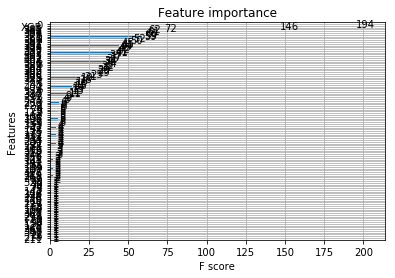

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(R_XG_L2)
plt.show()
#print(R_XG_L1.feature_importances_)

In [24]:
output = pd.DataFrame({'id': df_test['ID'].astype(np.int32), 'y': y_pred_XG_L2})
output.to_csv('tr3.csv', index=False)